In [16]:

import sympy as sp
import numpy as np
import pandas as pd
import pint
u = pint.UnitRegistry()
Q= u.Quantity
import scipy.constants as cnst
from scipy import optimize
import scipy

from matplotlib import pyplot as plt 
from sympy.interactive import printing
sp.init_printing(use_latex=True) # doctest: +SKIP

from IPython.display import HTML
#from iapws import IAPWS97
import ternary

In [131]:
df=pd.read_excel("Datos.xlsx",skiprows=1)
df.columns= ["C","B","A","N","C2","B2","A2"]
#df[['A', 'B', 'C']].values
df.columns

Index(['C', 'B', 'A', 'N', 'C2', 'B2', 'A2'], dtype='object')

<Figure size 800x800 with 0 Axes>

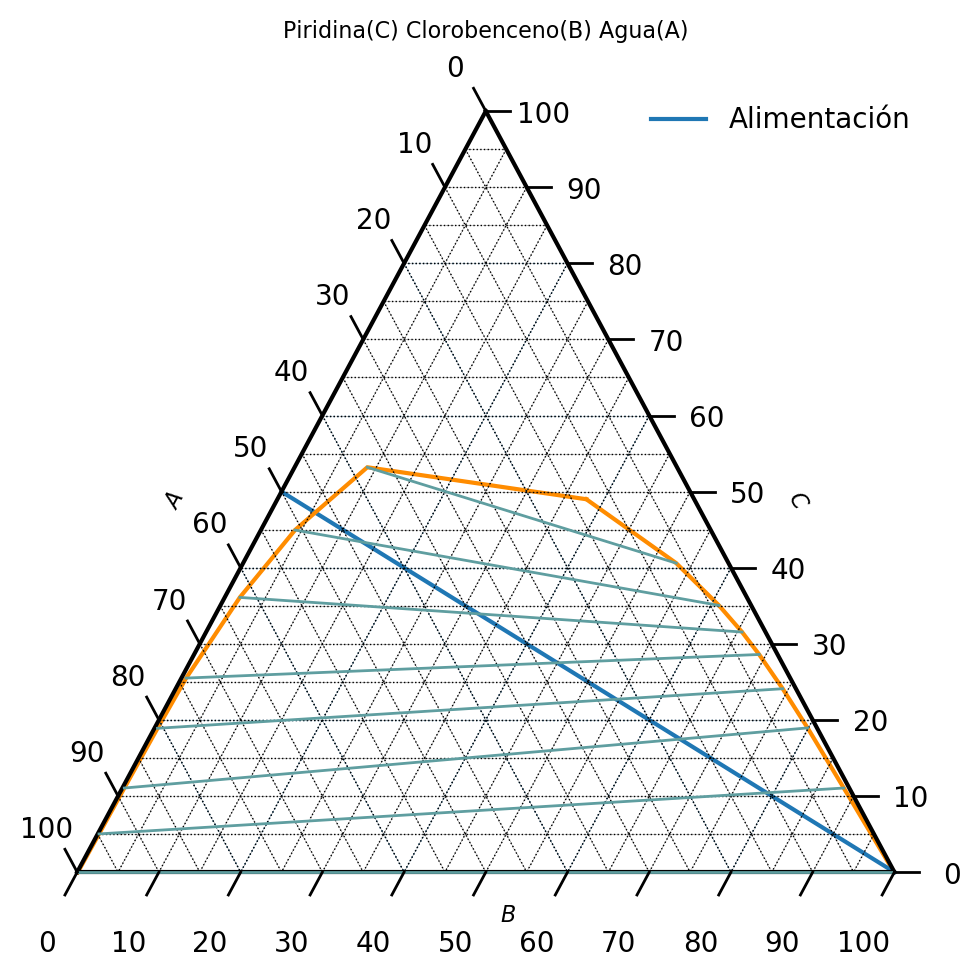

In [182]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (4, 4)
plt.tight_layout()

fig, tax = ternary.figure(scale=100)
fig.set_size_inches(5, 5,5)
tax.plot(df[['B', 'C','A']].values,color="darkorange")
tax.plot([[0,50,50],[100,0,0]],label="Alimentación")
tax.plot(df[['B2', 'C2', 'A2']].values,color="darkorange")
tax.gridlines(multiple=20)
tax.get_axes().axis('off')


# Draw Boundary and Gridlines
tax.boundary(linewidth=1.5)
tax.gridlines(color="black", multiple=5)
tax.gridlines(color="black", multiple=5, linewidth=0.2)

# Set Axis labels and Title
fontsize = 8
tax.set_title("Piridina(C) Clorobenceno(B) Agua(A)\n", fontsize=fontsize)
tax.left_axis_label("$A$", fontsize=fontsize, offset=0.14)
tax.right_axis_label("$C$", fontsize=fontsize, offset=0.14)
tax.bottom_axis_label("$B$", fontsize=fontsize, offset=-0.10)


for m in np.arange(0,len(df["A"])):
    p1 = (df["B"][m], df["C"][m], df["A"][m])
    p2 = (df["B2"][m], df["C2"][m], df["A2"][m])
    tax.line(p1, p2, linewidth=1, marker='', color='cadetblue', linestyle="-")


# Set ticks
tax.ticks(axis='rbl', linewidth=1, multiple=10, offset=0.03,clockwise=False)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
fig.tight_layout()
plt.legend(frameon=False)
tax.savefig("Diagrama.png")
ternary.plt.show()
